In [19]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

## Load data for single genome

Data path

In [3]:
from splicevo.utils.data_utils import load_processed_data
import json
import os

data_dir = f"{os.environ['HOME']}/sds/sd17d003/Anamaria/splicevo/data/processed_small/"

genome_id = "mouse_GRCm38"
genome_dir = os.path.join(data_dir, genome_id)

sequences, labels, alpha, beta, sse, species = load_processed_data(genome_dir)

Sequences shape: (39580, 1900, 4)
Labels shape: (39580, 1000)
Loading alpha with shape (39580, 1000, 27)
Alpha shape: (39580, 1000, 27)
Loading beta with shape (39580, 1000, 27)
Beta shape: (39580, 1000, 27)
Loading sse with shape (39580, 1000, 27)
SSE shape: (39580, 1000, 27)


Distribution of SSE values

________________________________
Loading genome: human_GRCh37
Sequences shape: (41152, 1900, 4)
Labels shape: (41152, 1000)
Loading alpha with shape (41152, 1000, 20)
Alpha shape: (41152, 1000, 20)
Loading beta with shape (41152, 1000, 20)
Beta shape: (41152, 1000, 20)
Loading sse with shape (41152, 1000, 20)
SSE shape: (41152, 1000, 20)
Number of NaNs: 657589 (35.90%)


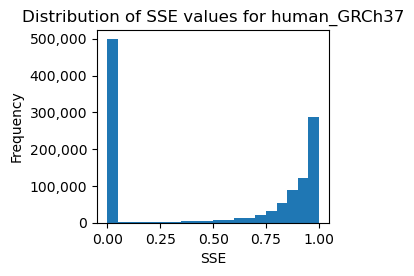

Number of zeros: 496535 (42.28%)
Number of ones: 152025 (12.95%)
________________________________
Loading genome: mouse_GRCm38
Sequences shape: (39580, 1900, 4)
Labels shape: (39580, 1000)
Loading alpha with shape (39580, 1000, 27)
Alpha shape: (39580, 1000, 27)
Loading beta with shape (39580, 1000, 27)
Beta shape: (39580, 1000, 27)
Loading sse with shape (39580, 1000, 27)
SSE shape: (39580, 1000, 27)
Number of NaNs: 772690 (33.11%)


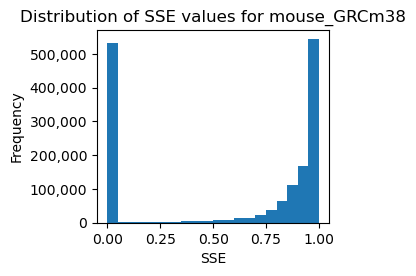

Number of zeros: 531538 (34.05%)
Number of ones: 312344 (20.01%)
________________________________
Loading genome: rat_Rnor_5.0
Sequences shape: (32491, 1900, 4)
Labels shape: (32491, 1000)
Loading alpha with shape (32491, 1000, 21)
Alpha shape: (32491, 1000, 21)
Loading beta with shape (32491, 1000, 21)
Beta shape: (32491, 1000, 21)
Loading sse with shape (32491, 1000, 21)
SSE shape: (32491, 1000, 21)
Number of NaNs: 538159 (36.92%)


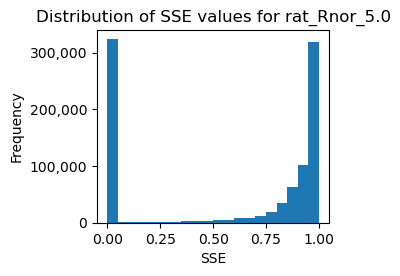

Number of zeros: 322519 (35.07%)
Number of ones: 173652 (18.88%)


In [4]:
# distribution of SSE values
import numpy as np

for genome_id in ["human_GRCh37", "mouse_GRCm38", "rat_Rnor_5.0"]:

	print("________________________________")
	print(f"Loading genome: {genome_id}")

	genome_dir = os.path.join(data_dir, genome_id)
	sequences, labels, alpha, beta, sse, _ = load_processed_data(genome_dir)

	# Splice mask
	splice_mask = labels.flatten() > 0

	# Apply mask to every column in train SSE
	flat_sse = sse.reshape(-1, sse.shape[-1])[splice_mask]
		

	# How many are NaNs?
	num_nans = np.sum(np.isnan(flat_sse))
	print(f"Number of NaNs: {num_nans} ({num_nans / flat_sse.size * 100:.2f}%)")

	# Remove NaNs for summary statistics
	flat_sse = flat_sse[~np.isnan(flat_sse)]

	# Plot distribution
	import matplotlib.pyplot as plt
	plt.figure(figsize=(3, 2.5))
	plt.hist(flat_sse, bins=20)
	plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
	plt.title(f"Distribution of SSE values for {genome_id}")
	plt.xlabel("SSE")
	plt.ylabel("Frequency")
	plt.show()

	# Number of zeros
	num_zeros = np.sum(flat_sse == 0)
	print(f"Number of zeros: {num_zeros} ({num_zeros / flat_sse.size * 100:.2f}%)")

	# Number of ones
	num_ones = np.sum(flat_sse == 1)
	print(f"Number of ones: {num_ones} ({num_ones / flat_sse.size * 100:.2f}%)")
	# Summary statistics
	summary = {
		"count": flat_sse.size,
		"mean": np.mean(flat_sse),
		"std": np.std(flat_sse),
		"min": np.min(flat_sse),
		"25%": np.percentile(flat_sse, 25),
		"50%": np.percentile(flat_sse, 50),
		"75%": np.percentile(flat_sse, 75),
		"max": np.max(flat_sse)
	}
	summary

## Load split training and test data

In [6]:
from splicevo.utils.data_utils import load_processed_data
import json
import os
import pandas as pd

data_dir = f"{os.environ['HOME']}/sds/sd17d003/Anamaria/splicevo/data/splits_small/mouse_rat"

# TRAIN DATA
train_fn = "train"
train_path = os.path.join(data_dir, train_fn)
print(f"Loading training data {train_path}...")
train_sequences, train_labels, train_alpha, train_beta, train_sse, train_species = load_processed_data(train_path)

train_meta_fn = os.path.join(train_path, "metadata.csv")
train_meta_df = pd.read_csv(train_meta_fn, dtype={"chromosome": str})

# TEST DATA
test_fn = "test"
test_path = os.path.join(data_dir, test_fn)
print(f"Loading test data {test_path}...")
test_sequences, test_labels, test_alpha, test_beta, test_sse, test_species = load_processed_data(test_path)

test_meta_fn = os.path.join(test_path, "metadata.csv")
test_meta_df = pd.read_csv(test_meta_fn, dtype={"chromosome": str})

Loading training data /home/elek/sds/sd17d003/Anamaria/splicevo/data/splits_small/mouse_rat/train...
Sequences shape: (50821, 1900, 4)
Labels shape: (50821, 1000)
Loading alpha with shape (50821, 1000, 28)
Alpha shape: (50821, 1000, 28)
Loading beta with shape (50821, 1000, 28)
Beta shape: (50821, 1000, 28)
Loading sse with shape (50821, 1000, 28)
SSE shape: (50821, 1000, 28)
Loading test data /home/elek/sds/sd17d003/Anamaria/splicevo/data/splits_small/mouse_rat/test...
Sequences shape: (9701, 1900, 4)
Labels shape: (9701, 1000)
Loading alpha with shape (9701, 1000, 28)
Alpha shape: (9701, 1000, 28)
Loading beta with shape (9701, 1000, 28)
Beta shape: (9701, 1000, 28)
Loading sse with shape (9701, 1000, 28)
SSE shape: (9701, 1000, 28)


In [7]:
train_meta_df

,genome_id,chromosome,gene_id,strand,window_start,window_end,n_donor_sites,n_acceptor_sites,species_id
0,mouse_GRCm38,15,mou.15412,+,3252523,3253523,2,1,0
1,mouse_GRCm38,15,mou.15427,+,3268769,3269769,1,0,0
2,mouse_GRCm38,15,mou.15427,+,3270769,3271769,15,0,0
3,mouse_GRCm38,15,mou.15427,+,3271769,3272769,3,7,0
4,mouse_GRCm38,15,mou.15427,+,3272769,3273769,4,0,0
...,...,...,...,...,...,...,...,...,...
50816,rat_Rnor_5.0,20,rat.24597,+,57268566,57269566,0,3,1
50817,rat_Rnor_5.0,20,rat.24601,-,57779479,57780479,59,77,1
50818,rat_Rnor_5.0,20,rat.24601,-,57780479,57781479,14,19,1
50819,rat_Rnor_5.0,20,rat.24601,-,57781479,57782479,30,17,1


In [8]:
test_meta_df

,genome_id,chromosome,gene_id,strand,window_start,window_end,n_donor_sites,n_acceptor_sites,species_id
0,mouse_GRCm38,18,mou.21215,-,3267733,3268733,0,26,0
1,mouse_GRCm38,18,mou.21215,-,3272733,3273733,26,26,0
2,mouse_GRCm38,18,mou.21215,-,3275733,3276733,16,16,0
3,mouse_GRCm38,18,mou.21215,-,3280733,3281733,7,0,0
4,mouse_GRCm38,18,mou.21215,-,3283733,3284733,0,1,0
...,...,...,...,...,...,...,...,...,...
9696,rat_Rnor_5.0,18,rat.18794,+,86660900,86661900,9,0,1
9697,rat_Rnor_5.0,18,rat.18794,+,86668900,86669900,4,4,1
9698,rat_Rnor_5.0,18,rat.18794,+,86669900,86670900,18,18,1
9699,rat_Rnor_5.0,18,rat.18794,+,86670900,86671900,5,13,1


In [9]:
# Check that there is no overlap between train_meta and test_meta
# by checking that there are no common values in the 'genome_id' + 'chromosome' + 'window_start' + 'window_end' column
# between the two dataframes
train_meta_df['unique_id'] = train_meta_df['genome_id'].astype(str) + "_" + train_meta_df['chromosome'].astype(str) + "_" + train_meta_df['window_start'].astype(str) + "_" + train_meta_df['window_end'].astype(str)
test_meta_df['unique_id'] = test_meta_df['genome_id'].astype(str) + "_" + test_meta_df['chromosome'].astype(str) + "_" + test_meta_df['window_start'].astype(str) + "_" + test_meta_df['window_end'].astype(str)
common_ids = set(train_meta_df['unique_id']).intersection(set(test_meta_df['unique_id']))
print(f"Number of common unique_ids between train and test: {len(common_ids)}")

Number of common unique_ids between train and test: 0


Distribution of SSE values in train and test sets per genome

Number of NaNs in train SSE: 771360 (24.00%)


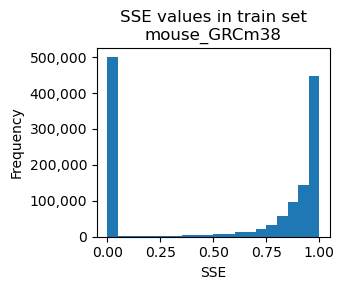

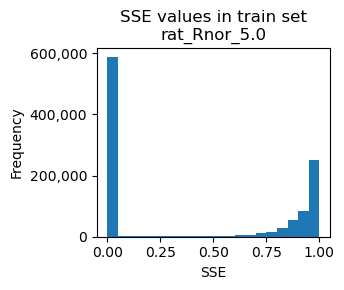

Number of zeros in train SSE: 1086844 (44.49%)
Number of ones in train SSE: 389988 (15.96%)
{'count': 2443124, 'mean': np.float32(0.49920323), 'std': np.float32(0.4614121), 'min': np.float32(0.0), '25%': np.float32(0.0), '50%': np.float32(0.733), '75%': np.float32(0.963), 'max': np.float32(1.0)}
Number of NaNs in test SSE: 106830 (19.65%)


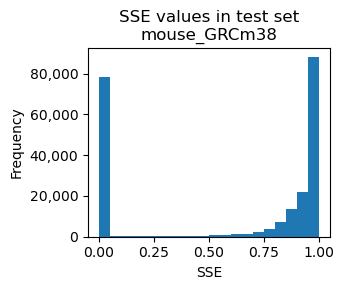

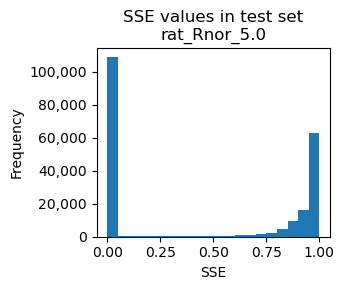

Number of zeros in test SSE: 186992 (42.82%)
Number of ones in test SSE: 88082 (20.17%)
{'count': 436734, 'mean': np.float32(0.5252526), 'std': np.float32(0.46750352), 'min': np.float32(0.0), '25%': np.float32(0.0), '50%': np.float32(0.833), '75%': np.float32(0.979), 'max': np.float32(1.0)}


In [10]:
# distribution of SSE values
import numpy as np

for i in ['train', 'test']:
	if i == 'train':
		# Splice mask
		splice_mask = train_labels.flatten() > 0
		# Labels
		current_labels = train_labels
		# Values
		current_sse = train_sse
	else:
		# Splice mask
		splice_mask = test_labels.flatten() > 0
		# Labels
		current_labels = test_labels
		# Values
		current_sse = test_sse

	# Apply mask to every column in train/tesr SSE
	flat_sse = current_sse.reshape(-1, current_sse.shape[-1])[splice_mask]

	# How many are NaNs?
	num_nans = np.sum(np.isnan(flat_sse))
	print(f"Number of NaNs in {i} SSE: {num_nans} ({num_nans / flat_sse.size * 100:.2f}%)")

	# Remove NaNs for summary statistics
	flat_sse = flat_sse[~np.isnan(flat_sse)]

	# Plot distribution separately for each species
	import matplotlib.pyplot as plt

	# Get the corresponding metadata dataframe
	meta_df = train_meta_df if i == 'train' else test_meta_df

	# Get unique species
	species_ids = meta_df['species_id'].unique()
	species_names = meta_df[['species_id', 'genome_id']].drop_duplicates().set_index('species_id')['genome_id'].to_dict()

	for species_id in species_ids:
		# Find indices for this species
		species_indices = meta_df.index[meta_df['species_id'] == species_id].to_numpy()
		# For each index, get the slice of current_sse and current_labels
		species_sse = current_sse[species_indices]
		species_labels = current_labels[species_indices]
		# Flatten and mask
		species_mask = species_labels.flatten() > 0
		flat_species_sse = species_sse.reshape(-1, species_sse.shape[-1])[species_mask]
		flat_species_sse = flat_species_sse[~np.isnan(flat_species_sse)]

		plt.figure(figsize=(3.5, 3))
		plt.hist(flat_species_sse, bins=20)
		plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
		plt.title(f"SSE values in {i} set\n{species_names[species_id]}")
		plt.xlabel("SSE")
		plt.ylabel("Frequency")
		plt.tight_layout()
		plt.show()

	# Number of zeros
	num_zeros = np.sum(flat_sse == 0)
	print(f"Number of zeros in {i} SSE: {num_zeros} ({num_zeros / flat_sse.size * 100:.2f}%)")

	# Number of ones
	num_ones = np.sum(flat_sse == 1)
	print(f"Number of ones in {i} SSE: {num_ones} ({num_ones / flat_sse.size * 100:.2f}%)")
	# Summary statistics
	summary = {
		"count": flat_sse.size,
		"mean": np.mean(flat_sse),
		"std": np.std(flat_sse),
		"min": np.min(flat_sse),
		"25%": np.percentile(flat_sse, 25),
		"50%": np.percentile(flat_sse, 50),
		"75%": np.percentile(flat_sse, 75),
		"max": np.max(flat_sse)
	}
	print(summary)

Per tissue distribution of SSE values per tissue

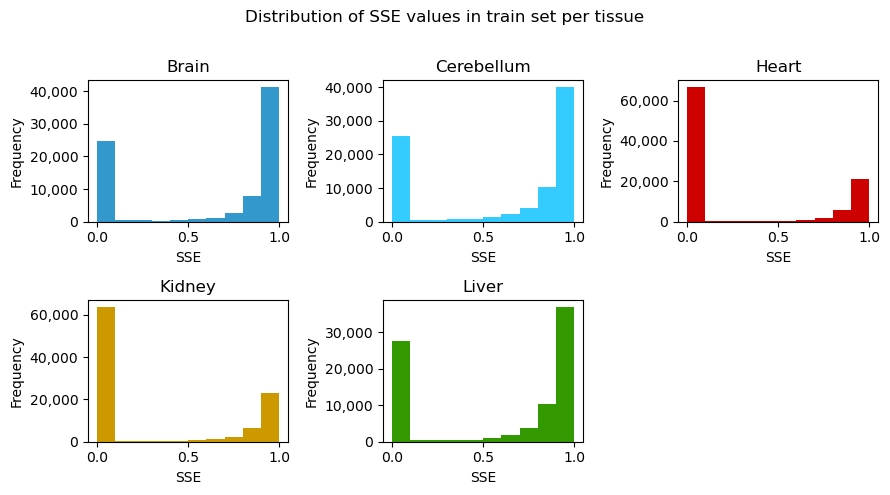

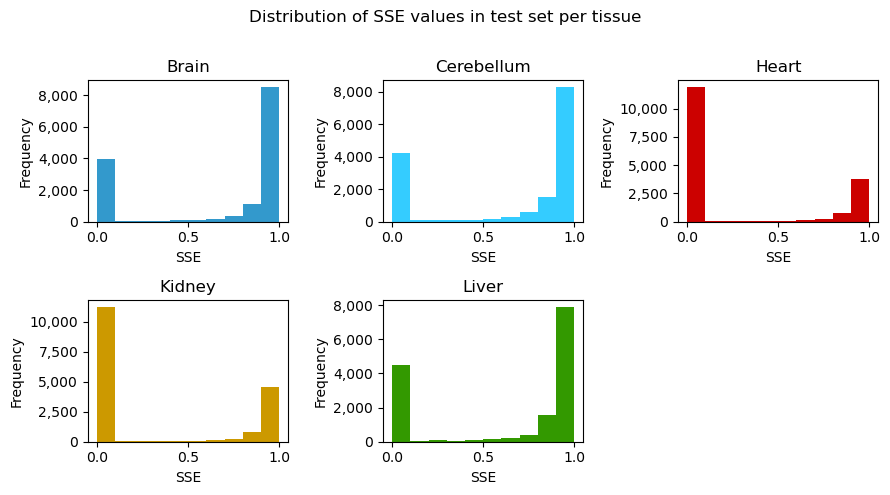

In [11]:
# Per tissue true SSE distribution
import pandas as pd
import matplotlib.pyplot as plt

# Define tissue colors
tissue_colors = {
    'Brain': '#3399cc',
    'Cerebellum': '#34ccff',
    'Heart': '#cc0100',
    'Kidney': '#cc9900',
    'Liver': '#339900',
    'Ovary': '#cc329a',
    'Testis': '#ff6600'
}

for split in ['train', 'test']:
    if split == 'train':
        meta_fn = os.path.join(train_path, "metadata.json")
        current_sse = train_sse
        current_labels = train_labels
    else:
        meta_fn = os.path.join(test_path, "metadata.json")
        current_sse = test_sse
        current_labels = test_labels

    # Load metadata
    with open(meta_fn, 'r') as f:
        meta = json.load(f)

    # Get tissues in train/test set
    tissues = []
    for cond in meta['usage_conditions']:
        tiss = cond.split('_')[0]
        if tiss not in tissues:
            tissues.append(tiss)

    # Plot layout
    n_tissues = len(tissues)
    n_cols = 3
    n_rows = (n_tissues + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2.5), squeeze=False)

    for tiss_idx, tiss_name in enumerate(tissues):
        ax = axes[tiss_idx // n_cols, tiss_idx % n_cols]
        tiss_sse = current_sse[:, :, tiss_idx].flatten()
        tiss_sse = tiss_sse[current_labels.flatten() > 0]
        tiss_sse = tiss_sse[~np.isnan(tiss_sse)]
        ax.hist(tiss_sse, bins=10, color=tissue_colors.get(tiss_name, '#333333'))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        ax.set_title(f"{tiss_name}")
        ax.set_xlabel("SSE")
        ax.set_ylabel("Frequency")

    # Hide unused subplots
    for i in range(n_tissues, n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols])

    fig.suptitle(f"Distribution of SSE values in {split} set per tissue")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


Check the values are parsed correctly by comparing to the example from the paper

In [16]:
def map_coord_to_meta(coord, genom, df):
    chrom, position, type = coord.split(':')
    df_chrom = df[ (df['genome_id'] == genom) & (df['chromosome'] == chrom) ]
    # which entry in dataframe contains the position
    idx = df_chrom[(df_chrom['window_start'] <= int(position)) & (df_chrom['window_end'] >= int(position))].index.tolist()[0]
    # relative offset within the window
    offset = int(position) - df_chrom.loc[idx, 'window_start'] 
    # if 1 (acceptor)
    if type == '1':
        offset = offset - 1
    # if 2 (donor)
    if type == '2':
        offset = offset + 1

    return int(idx), int(offset)

genome = ['human_GRCh37', 'human_GRCh37', 'mouse_GRCm38', 'mouse_GRCm38']
coords = ['21:27369675:1', '21:27369731:2', '16:85040251:1', '16:85040307:2']

maps = []
for coord, genom in zip(coords, genome):
    split = ''
    try:
        idx, pos = map_coord_to_meta(coord, genom, test_meta_df)
        split = 'test'
    except Exception as e:
        idx, pos = map_coord_to_meta(coord, genom, train_meta_df)
        split = 'train'
    
    if split == 'train':
        labl = train_labels[idx, pos]
    else:
        labl = test_labels[idx, pos]
    
    maps.append((idx, pos, labl, split))

    print(f"Coordinate {coord} maps to metadata index {idx}, position {pos} in {split} set, splice class {labl}")

Coordinate 21:27369675:1 maps to metadata index 274, position 591 in test set, splice class 1
Coordinate 21:27369731:2 maps to metadata index 274, position 649 in test set, splice class 2
Coordinate 16:85040251:1 maps to metadata index 27170, position 817 in train set, splice class 1
Coordinate 16:85040307:2 maps to metadata index 27170, position 875 in train set, splice class 2


In [17]:
# Mapping to conditions
meta_fn = os.path.join(test_path, "metadata.json")
with open(meta_fn, 'r') as f:
    meta = json.load(f)

conditions = meta['usage_conditions']
conditions_map = {}
for cond_idx, cond in enumerate(conditions):
    tissue = cond.split('_')[0]
    conditions_map[cond_idx] = cond

# Make dataframe for plotting
sse_data = []
for map_entry, coord, genom in zip(maps, coords, genome):
    chrom = coord.split(':')[0]
    position = int(coord.split(':')[1])
    idx, offset, labl, split = map_entry
    if split == 'train':
        sse_values = train_sse[idx, offset, :]
    else:
        sse_values = test_sse[idx, offset, :]
    print(f"Coordinate {coord} in {split} set has splice class {labl} and SSE values {sse_values}")
    for tiss_idx, sse_val in enumerate(sse_values):
        cond = conditions_map[tiss_idx]
        sse_data.append({
            'genome_id': genom,
            'chromosome': chrom,
            'position' : position,
            'split': split,
            'index': idx,
            'offset': offset,
            'condition': cond,
            'tissue': cond.split('_')[0],
            'timepoint': int(cond.split('_')[1]),
            'sse': sse_val
        })

sse_df = pd.DataFrame(sse_data)
sse_df

Coordinate 21:27369675:1 in test set has splice class 1 and SSE values [0.29  0.013 0.035 0.    0.    0.574 0.633 0.593 0.409 0.384 0.541 0.424
 0.   ]
Coordinate 21:27369731:2 in test set has splice class 2 and SSE values [0.303 0.011 0.032 0.    0.    0.594 0.673 0.598 0.467 0.414 0.538 0.578
 0.   ]
Coordinate 16:85040251:1 in train set has splice class 1 and SSE values [  nan   nan 0.097 0.053 0.06  0.29  0.451 0.285 0.781 0.515 0.478 0.678
 0.463]
Coordinate 16:85040307:2 in train set has splice class 2 and SSE values [0.108 0.918 0.047 0.039 0.026 0.222 0.425 0.276   nan 0.424 0.283 0.518
 0.31 ]


,genome_id,chromosome,position,split,index,offset,condition,tissue,timepoint,sse
0,human_GRCh37,21,27369675,test,274,591,Brain_1,Brain,1,0.290
1,human_GRCh37,21,27369675,test,274,591,Brain_10,Brain,10,0.013
2,human_GRCh37,21,27369675,test,274,591,Brain_5,Brain,5,0.035
3,human_GRCh37,21,27369675,test,274,591,Cerebellum_10,Cerebellum,10,0.000
4,human_GRCh37,21,27369675,test,274,591,Cerebellum_5,Cerebellum,5,0.000
5,human_GRCh37,21,27369675,test,274,591,Heart_1,Heart,1,0.574
6,human_GRCh37,21,27369675,test,274,591,Heart_10,Heart,10,0.633
7,human_GRCh37,21,27369675,test,274,591,Heart_5,Heart,5,0.593
8,human_GRCh37,21,27369675,test,274,591,Kidney_10,Kidney,10,0.409
9,human_GRCh37,21,27369675,test,274,591,Kidney_5,Kidney,5,0.384


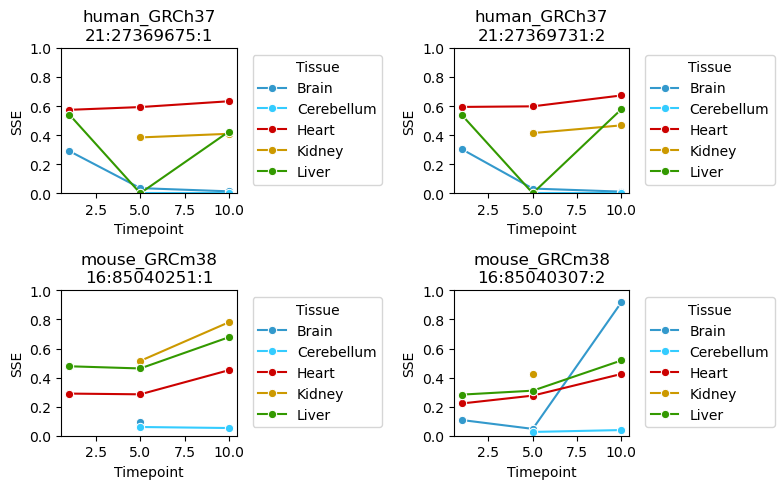

In [18]:
# Plot SSE values at specific coordinates
import seaborn as sns
import matplotlib.pyplot as plt

# Define tissue colors
tissue_colors = {
    'Brain': '#3399cc',
    'Cerebellum': '#34ccff',
    'Heart': '#cc0100',
    'Kidney': '#cc9900',
    'Liver': '#339900',
    'Ovary': '#cc329a',
    'Testis': '#ff6600'
}
# Grid layout
n_coords = len(coords)
n_cols = 2
n_rows = (n_coords + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 2.5), squeeze=False)

# Plot lineplot for each coordinate, color by tissue
for coord_idx, coord in enumerate(coords):
    ax = axes[coord_idx // n_cols, coord_idx % n_cols]
    coord_df = sse_df[(sse_df['genome_id'] == genome[coord_idx]) & (sse_df['chromosome'] == coord.split(':')[0]) & (sse_df['position'] == int(coord.split(':')[1])) ]
    sns.lineplot(data=coord_df, x='timepoint', y='sse', hue='tissue', palette=tissue_colors, marker='o', ax=ax)
    ax.set_title(f"{genome[coord_idx]}\n{coord}")
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("SSE")
    ax.set_ylim(0, 1)
    ax.legend(title='Tissue', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused subplots
for i in range(n_coords, n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()

In [11]:
coords

['21:27369675:1', '21:27369731:2', '16:85040251:1', '16:85040307:2']

## Load model predictions

In [ ]:
# Load the model predictions
from splicevo.utils.data_utils import load_predictions
pred_path = "/home/elek/projects/splicing/results/predictions_resnet_weightmse"
pred_labels, pred_probs, pred_sse, meta, true_labels, true_sse = load_predictions(pred_path)

In [ ]:
# Distribution of true SSE values in the test set
import numpy as np
# Flatten
flat_true_sse = true_sse.flatten()
# How many are NaNs?
num_nans_true = np.sum(np.isnan(flat_true_sse))
print(f"Number of NaNs in true SSE: {num_nans_true} ({num_nans_true / flat_true_sse.size * 100:.2f}%)")
# Remove NaNs for summary statistics
flat_true_sse = flat_true_sse[~np.isnan(flat_true_sse)]
# Plot distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(flat_true_sse, bins=50, edgecolor='black')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title("Distribution of SSE values in the test set")
plt.xlabel("SSE")
plt.ylabel("Frequency")
plt.show()

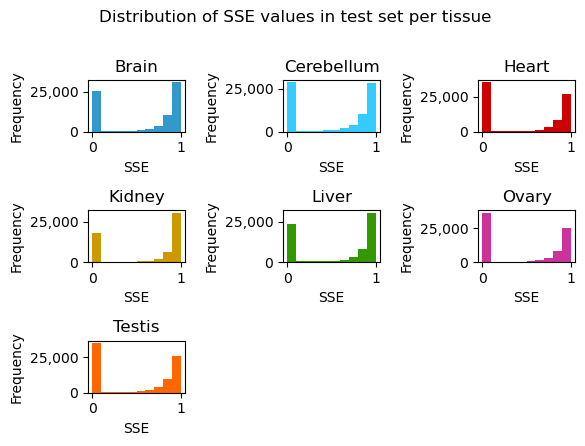

In [ ]:
# Distribution of true SSE values in the test set per tissue
import pandas as pd
import matplotlib.pyplot as plt
# Get tissues in test set
tissues = []
for cond in meta['conditions']:
    tiss = cond.split('_')[0]
    if tiss not in tissues:
        tissues.append(tiss)
        
n_tissues = len(tissues)
n_cols = 3
n_rows = (n_tissues + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 1.5), squeeze=False)

for tiss_idx, tiss_name in enumerate(tissues):
    ax = axes[tiss_idx // n_cols, tiss_idx % n_cols]
    tiss_sse = true_sse[:, :, tiss_idx].flatten()
    tiss_sse = tiss_sse[true_labels.flatten() > 0]
    tiss_sse = tiss_sse[~np.isnan(tiss_sse)]
    ax.hist(tiss_sse, bins=10, color=tissue_colors.get(tiss_name, '#333333'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_title(f"{tiss_name}")
    ax.set_xlabel("SSE")
    ax.set_ylabel("Frequency")

# Hide unused subplots
for i in range(n_tissues, n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

fig.suptitle("Distribution of SSE values in test set per tissue")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Number of NaNs in predicted SSE: 0 (0.00%)


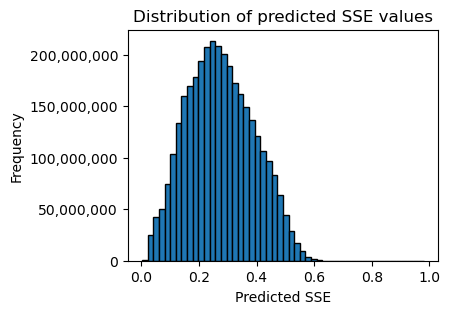

In [ ]:
# Distribution of predicted SSE values
import numpy as np
# Flatten predicted SSE
flat_pred_sse = pred_sse.flatten()
# How many are NaNs?
num_nans_pred = np.sum(np.isnan(flat_pred_sse))
print(f"Number of NaNs in predicted SSE: {num_nans_pred} ({num_nans_pred / flat_pred_sse.size * 100:.2f}%)")
# Remove NaNs for summary statistics
flat_pred_sse = flat_pred_sse[~np.isnan(flat_pred_sse)]
# Plot distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.hist(flat_pred_sse, bins=50, edgecolor='black')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title("Distribution of predicted SSE values")
plt.xlabel("Predicted SSE")
plt.ylabel("Frequency")
plt.show()

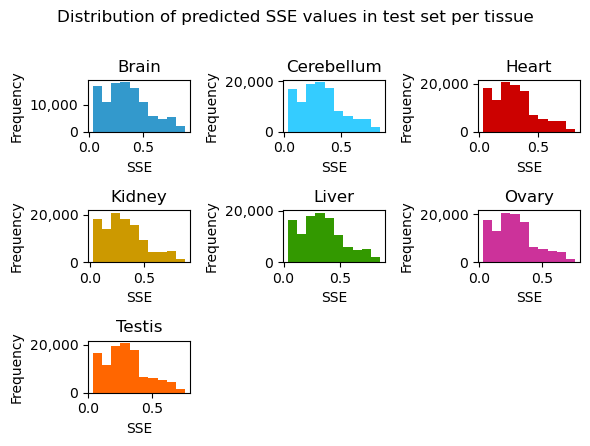

In [ ]:
# Distribution of predicted SSE values in the test set per tissue
import pandas as pd
import matplotlib.pyplot as plt

# Get tissues in test set
tissues = []
for cond in meta['conditions']:
    tiss = cond['tissue']
    if tiss not in tissues:
        tissues.append(tiss)
        
n_tissues = len(tissues)
n_cols = 3
n_rows = (n_tissues + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 1.5), squeeze=False)

for tiss_idx, tiss_name in enumerate(tissues):
    ax = axes[tiss_idx // n_cols, tiss_idx % n_cols]
    tiss_sse = pred_sse[:, :, tiss_idx].flatten()
    tiss_sse = tiss_sse[true_labels.flatten() > 0]
    tiss_sse = tiss_sse[~np.isnan(tiss_sse)]
    ax.hist(tiss_sse, bins=10, color=tissue_colors.get(tiss_name, '#333333'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_title(f"{tiss_name}")
    ax.set_xlabel("SSE")
    ax.set_ylabel("Frequency")

# Hide unused subplots
for i in range(n_tissues, n_rows * n_cols):
    fig.delaxes(axes[i // n_cols, i % n_cols])

fig.suptitle("Distribution of predicted SSE values in test set per tissue")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
# For every sequence, identify positions that are not NaN in any of the samples, then compare values
num_sequences = true_sse.shape[0]
num_positions = true_sse.shape[1]
num_samples = true_sse.shape[2]

# Get all sample names
sample_names = []
for cond in meta['conditions']:
    sample_names.append(cond['condition_key'])

matched_positions = {}

for seq_idx in range(num_sequences):
    # Find positions where any/all tissues are not NaN for this sequence
    valid_positions = np.where(np.any(~np.isnan(true_sse[seq_idx, :, :]), axis=1))[0]
    if len(valid_positions) == 0:
        continue
    for pos in valid_positions:
        true_vals = true_sse[seq_idx, pos, :]
        pred_vals = pred_sse[seq_idx, pos, :]
        matched_positions[(seq_idx, pos)] = { "true": true_vals, "pred": pred_vals }

# Combine all matched positions into a single dataframe for plotting
import pandas as pd
all_data = []
for (seq_idx, pos), vals in matched_positions.items():
    for smpl_idx, smpl_name in enumerate(sample_names):
        all_data.append({
            'sequence': seq_idx,
            'position': pos,
            'group': smpl_name,
            'tissue': smpl_name.split('_')[0],
            'timepoint': smpl_name.split('_')[1],
            'true_SSE': vals['true'][smpl_idx],
            'pred_SSE': vals['pred'][smpl_idx]
        })  

all_data_df = pd.DataFrame(all_data)
all_data_df['site'] = all_data_df['sequence'].astype(str) + '_' + all_data_df['position'].astype(str)
all_data_df['tissue'] = all_data_df['group'].apply(lambda x: x.split('_')[0])
all_data_df['timepoint'] = all_data_df['group'].apply(lambda x: x.split('_')[1])
all_data_df = all_data_df.fillna(0)
all_data_df

,sequence,position,group,tissue,timepoint,true_SSE,pred_SSE,site
0,0,0,Brain_1,Brain,1,0.0,0.042462,0_0
1,0,0,Brain_4,Brain,4,0.0,0.044164,0_0
2,0,0,Brain_5,Brain,5,0.0,0.039307,0_0
3,0,0,Brain_7,Brain,7,0.0,0.045252,0_0
4,0,0,Brain_9,Brain,9,0.0,0.046859,0_0
...,...,...,...,...,...,...,...,...
6456489,54042,934,Testis_8,Testis,8,0.0,0.049349,54042_934
6456490,54042,934,Testis_9,Testis,9,0.0,0.056415,54042_934
6456491,54042,934,Testis_10,Testis,10,0.0,0.066865,54042_934
6456492,54042,934,Testis_14,Testis,14,0.0,0.125144,54042_934


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get tissues in test set
tissues = []
for cond in meta['conditions']:
    tiss = cond['tissue']
    if tiss not in tissues:
        tissues.append(tiss)
        
n_tissues = len(tissues)
n_cols = 3
n_rows = (n_tissues + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), squeeze=False)

for tiss_idx, tiss_name in enumerate(tissues):
    ax = axes[tiss_idx // n_cols, tiss_idx % n_cols]
    plot_data = all_data_df[all_data_df['tissue'] == tiss_name]

    # 2d density plot
    plot_col = tissue_colors.get(tiss_name, 'gray')
    plot_shade = sns.light_palette(plot_col, as_cmap=True)
    sns.kdeplot(
        x=plot_data['true_SSE'],
        y=plot_data['pred_SSE'],
        levels=10,
        fill = True,
        cmap=plot_shade,
        ax=ax
    )

    # Top histogram (True SSE)
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histx.hist(
        plot_data['true_SSE'],
        bins=30,
        color=tissue_colors.get(tissue, 'gray'),
        alpha=0.7
    )
    # Remove x ticks; keep y axis visible
    ax_histx.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

    # Right histogram (Pred SSE)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)
    ax_histy.hist(
        plot_data['pred_SSE'],
        bins=30,
        orientation='horizontal',
        color=tissue_colors.get(tissue, 'gray'),
        alpha=0.7
    )

    # Add mean lines
    mean_true = plot_data['true_SSE'].mean()
    mean_pred = plot_data['pred_SSE'].mean()
    ax.axvline(mean_true, color='red', linestyle='--', linewidth=1, label='Mean True')
    ax.axhline(mean_pred, color='red', linestyle='--', linewidth=1, label='Mean Pred')
    
    # Remove y ticks; keep x axis visible
    ax_histy.tick_params(axis="y", which="both", left=False, right=False, labelleft=False)

    # Rotate x labels of right histogram and scatterplot
    plt.setp(ax_histy.get_xticklabels(), rotation=90, ha='center')
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

    # Remove all axis labels from histograms
    ax_histy.set_xlabel('')
    ax_histx.set_xlabel('')
    ax_histy.set_ylabel('')

    # Axis settings
    ax.set_title(f'{tissue}\n{timepoint}')
    ax.set_xlabel('True SSE')
    ax.set_ylabel('Predicted SSE')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid()

plt.tight_layout()
plt.savefig("plots/SSE_predicted_vs_true_scatter.pdf", dpi=300)
